### Praktische Prüfungsleistung
**Studiengang:** Zertifikat Data Analytics (DA) <br>
**Semester:** SoSe 2022 <br>
**Veranstaltung:** Praktische Datenanalyse <br>
**Matrikelnummer:** 3046496 <br>
**Name, Vorname:** Schiffmann, Christian <br>
**Datum:** 13.09.2022 <br>

<hr style="border:1px solid gray">

## Inhaltsverzeichnis:

1. [Einleitung und Requirements](#intro)<br>
    a. [Kontext der Datenanalyse](#introduction1) <br>
    b. [Aufbau und Ablauf der Datenanalyse](#introduction2)<br>
    c. [Ziel Key Performance Indikatoren](#introduction3)<br>
    d. [Requirements und Systemanforderungen](#introduction4)<br>
2. [Data Understanding and Exploratory Data Analysis](#Collection)<br>
3. [Data Cleaning and Preparation](#Cleaning)
6. [Modelling](#ML)
7. [Modelloptimierungen](#Optimization)
8. [Ergebnispräsentation](#Present)
9. [Abschlussbericht und Emfehlungen](#Recommendation)

## 1. Einleitung und Requirements <a name="intro"></a>

### 1.X. Requirements <a name="introduction4"></a>

Für die Datenanalyse werden eine Reihe von Libraries und Packages auf der Basis von Python genutzt, die die Analyse vereinfachen sollen. Anbei finden Sie eine kurze Aufführung der verwendeten Packages, Versionsnummern und eine kurze Beschreibung des Verwendungszweckes.

| Package  | Versionsnummer | Zweck |
|:--|:-:|:--|
| [Pandas](https://pandas.pydata.org/docs/) | 1.3.4 | Grundlegendes Package zur Manipulation und Transformation der Datensets |
| [Seaborn](https://seaborn.pydata.org/) | 0.11.2  | Package basierend auf Matplotlib für schnelle Visualisierungen von Daten  |
| [NumPy](https://numpy.org/) | 1.20.3 | Python-Bibliothek, die ein mehrdimensionales Array-Objekt, verschiedene abgeleitete Objekte (z. B. maskierte Arrays und Matrizen) und eine Reihe von Routinen für schnelle Operationen auf Arrays bereitstellt |
| [Matplotlib](https://matplotlib.org/) | 3.4.3 | Matplotlib ist eine umfassende Bibliothek zur Erstellung statischer, animierter und interaktiver Visualisierungen in Python |
| [Scipy](https://www.scipy.org/) | 1.7.1 | Das SciPy-Ökosystem umfasst allgemeine und spezielle Tools für die Datenverwaltung und -berechnung, produktive Experimente und Hochleistungsberechnungen |
| [Sklearn](https://scikit-learn.org/stable/) | 0.24.2 | Einfache und effiziente Tools für die prädiktive Datenanalyse |
| [Geopandas](https://geopandas.org/en/stable/) | 0.9.0 | GeoPandas ist ein Open-Source-Projekt, das die Arbeit mit Geodaten in Python erleichtert |


Lasst uns die folgenden Packages in unsere Umgebung laden.

In [13]:
import pandas as pd
import numpy as np

from scipy import stats
import scipy

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

import geopandas as gpd
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import sklearn

print('Sklearn:',sklearn.__version__)
print('Scipy:',scipy.__version__)
print('Matplotlib:',matplotlib.__version__)
print('NumPy:',np.__version__)
print('Seaborn:',sns.__version__)
print('Pandas:',pd.__version__)
print('Geopandas:',gpd.__version__)

Sklearn: 0.24.2
Scipy: 1.7.1
Matplotlib: 3.4.3
NumPy: 1.20.3
Seaborn: 0.11.2
Pandas: 1.3.4
Geopandas: 0.9.0


In [14]:
##Daten zu Hotel Buchungen 
df = pd.read_csv("data\hotel_bookings.csv")



In [15]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [16]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [17]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [25]:
col = sns.choose_colorbrewer_palette('diverging');

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

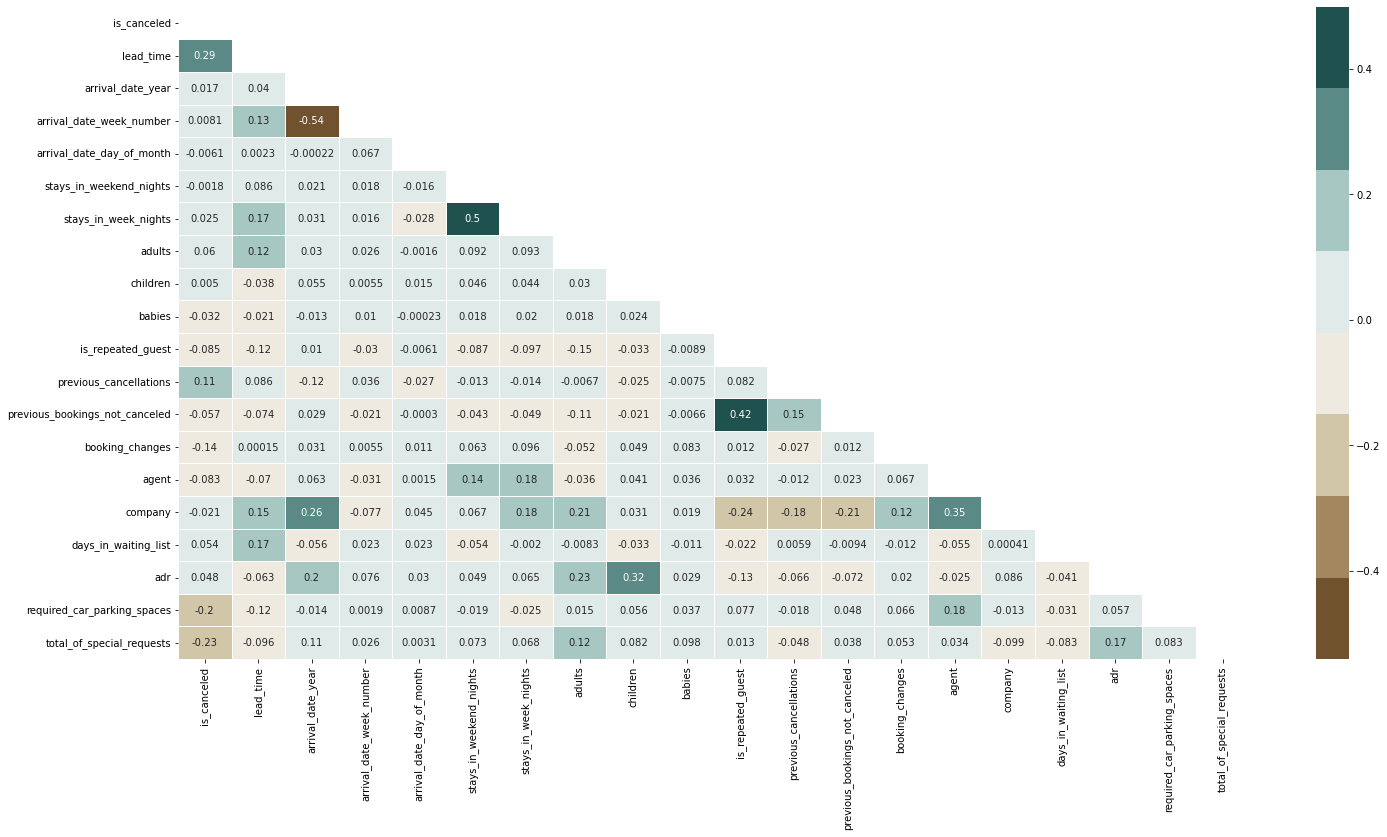

In [29]:
##col = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize = (24, 12))

corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)

mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            annot = True, 
            linewidths = 1,
            mask = mask,
            cmap=col)
plt.show()